https://app.datacamp.com/learn/competitions/abalone-seafood-farming

Can you estimate the age of an abalone?

📖 **Background**
- You are working as an intern for an abalone farming operation in Japan. 
- For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market.

- Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope.  Since this method is somewhat cumbersome and complex, 
- you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.


💾 The data
You have access to the following historical data (source):

**Abalone characteristics:**
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

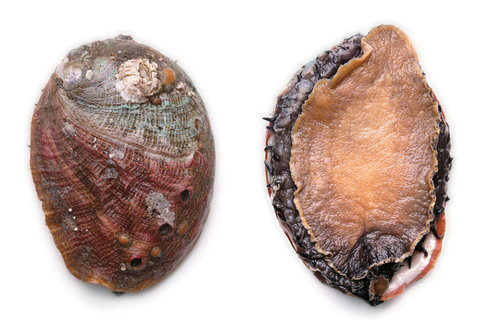

In [1653]:
from IPython.display import Image
Image ('https://static01.nyt.com/images/2014/06/06/dining/Monterey-Bay-Abalone/Monterey-Bay-Abalone-blog480.jpg')

💪 Competition challenge
Create a report that covers the following:

- Q1. How does weight change with age for each of the three sex categories?
- Q2. Can you estimate an abalone's age using its physical characteristics?
- Q3. Investigate which variables are better predictors of age for abalones.

*******

In [1654]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1655]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1656]:
# To read in the data and view the top 5 data
abalone = pd.read_csv('/content/drive/MyDrive/Tech4Dev/Databases/abalone.csv')
abalone.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [1657]:
# Checking the datatype for each column and total entries
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [1658]:
# The description of the numerical data
abalone.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


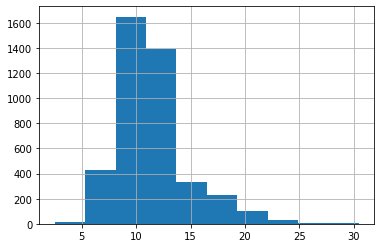

In [1659]:
abalone.age.hist()

In [1660]:
abalone['age'].max()

30.5

In [1661]:
#maximum age in each sex group
abalone.groupby('sex')[['age']].max()

,age
sex,
F,30.5
I,22.5
M,28.5


In [1662]:
#minimum age in each sex group
abalone.groupby('sex')[['age']].min()

,age
sex,
F,6.5
I,2.5
M,4.5


We can see an infant category in SEX, which is unusual.

After research, we found that:
- Abalone live about 35 to 40 years. 
  - This is consistent with our data where maximum age = 30.5 years old
- Adults become sexually mature when they are 4 to 6 years old. 

- We can see that minimum age in Female group = 6.5, in Males = 4.5, which is convinent with the mentioned information that maturity occurs at age 4 -6 years old.

- When looking at infant age distribution, we've found that maximum age in infant group = 22.5 which is not convenient.
  - Thus, we were thinking about trimming infant data where age > (mean of minimum adult age) ie. > 5.5 years



In [1663]:
abalone.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [1664]:
# Calculate percentage of infants where age is > 5.5
infant_count = (abalone.sex.value_counts())['I']
infnat_count_old_age = (abalone[abalone['age'] > 5.5].sex.value_counts())['I']

infant_percentage_old = (infnat_count_old_age / infant_count) * 100
infant_percentage_old

95.15648286140089

We can notice that almost all infant data is > 5.5, which means that removing these data is the same as removing the whole infant data.


In [1665]:
abalone[((abalone['sex'] == 'M') | (abalone['sex'] == 'F')) & (abalone['age'] <= 5.5)]['age'].count()

9

We can notice hear that only 9 abalones are below 5.5 in Adult males and females, which is consistent with our opinion.

In [1666]:
# To confirm if there are missing values
abalone.isnull().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

In [1667]:
# The shape of the data
abalone.shape

(4177, 10)

# **Q1. How does weight change with age for each of the three sex categories?**

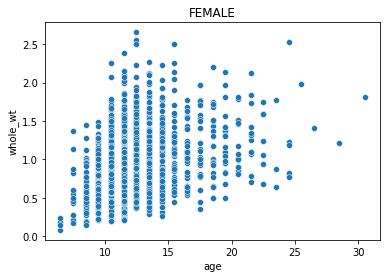

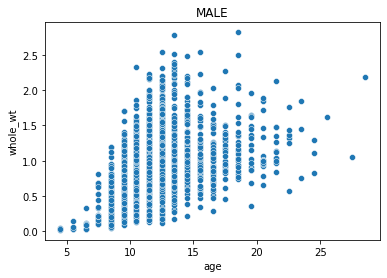

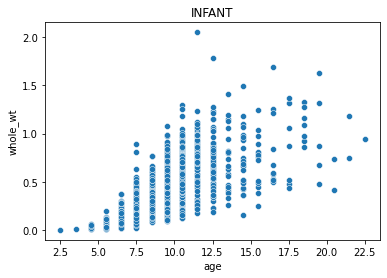

In [1668]:
plt.figure()

sns.scatterplot(x='age', y='whole_wt', data = abalone[abalone.sex == 'F'])
plt.title('FEMALE')
plt.figure()

sns.scatterplot(x='age', y='whole_wt', data = abalone[abalone.sex == 'M'])
plt.title('MALE')
plt.figure()

sns.scatterplot(x='age', y='whole_wt', data = abalone[abalone.sex == 'I'])
plt.title('INFANT')

plt.show()

From a study on certain types of abalone, it was found that growth rates were high initially and size-dependent for about the first 4 years during which shell length was a good predictor of age. Thereafter, growth rates were declined with increasing size resulting in a sigmoid growth curve (See the figure below)

Thus shell length will be more appropriate in defining age especially in young age.

In [1669]:
# https://scialert.net/fulltext/?doi=jfas.2009.210.227
from IPython.display import Image
Image (url = 'https://docsdrive.com/images/academicjournals/jfas/2009/fig7-2k9-210-227.gif')

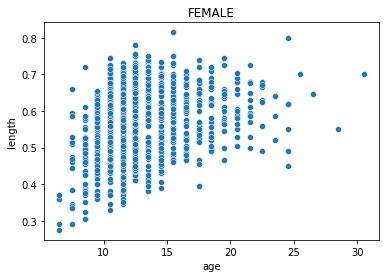

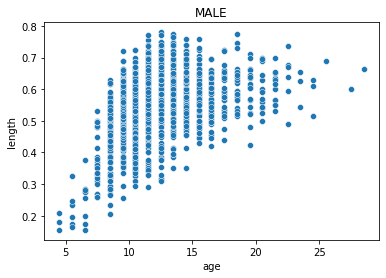

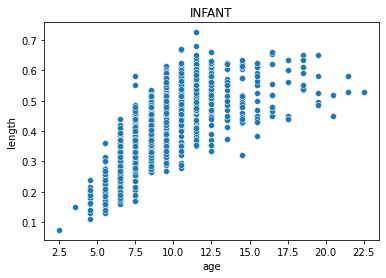

In [1670]:
plt.figure()

sns.scatterplot(x='age', y='length', data = abalone[abalone.sex == 'F'])
plt.title('FEMALE')
plt.figure()

sns.scatterplot(x='age', y='length', data = abalone[abalone.sex == 'M'])
plt.title('MALE')
plt.figure()

sns.scatterplot(x='age', y='length', data = abalone[abalone.sex == 'I'])
plt.title('INFANT')

plt.show()

- We can see that in infant group, the relationship of age with length shows more linearity than with whole weight.

# **Q2. Can you estimate an abalone's age using its physical characteristics?**

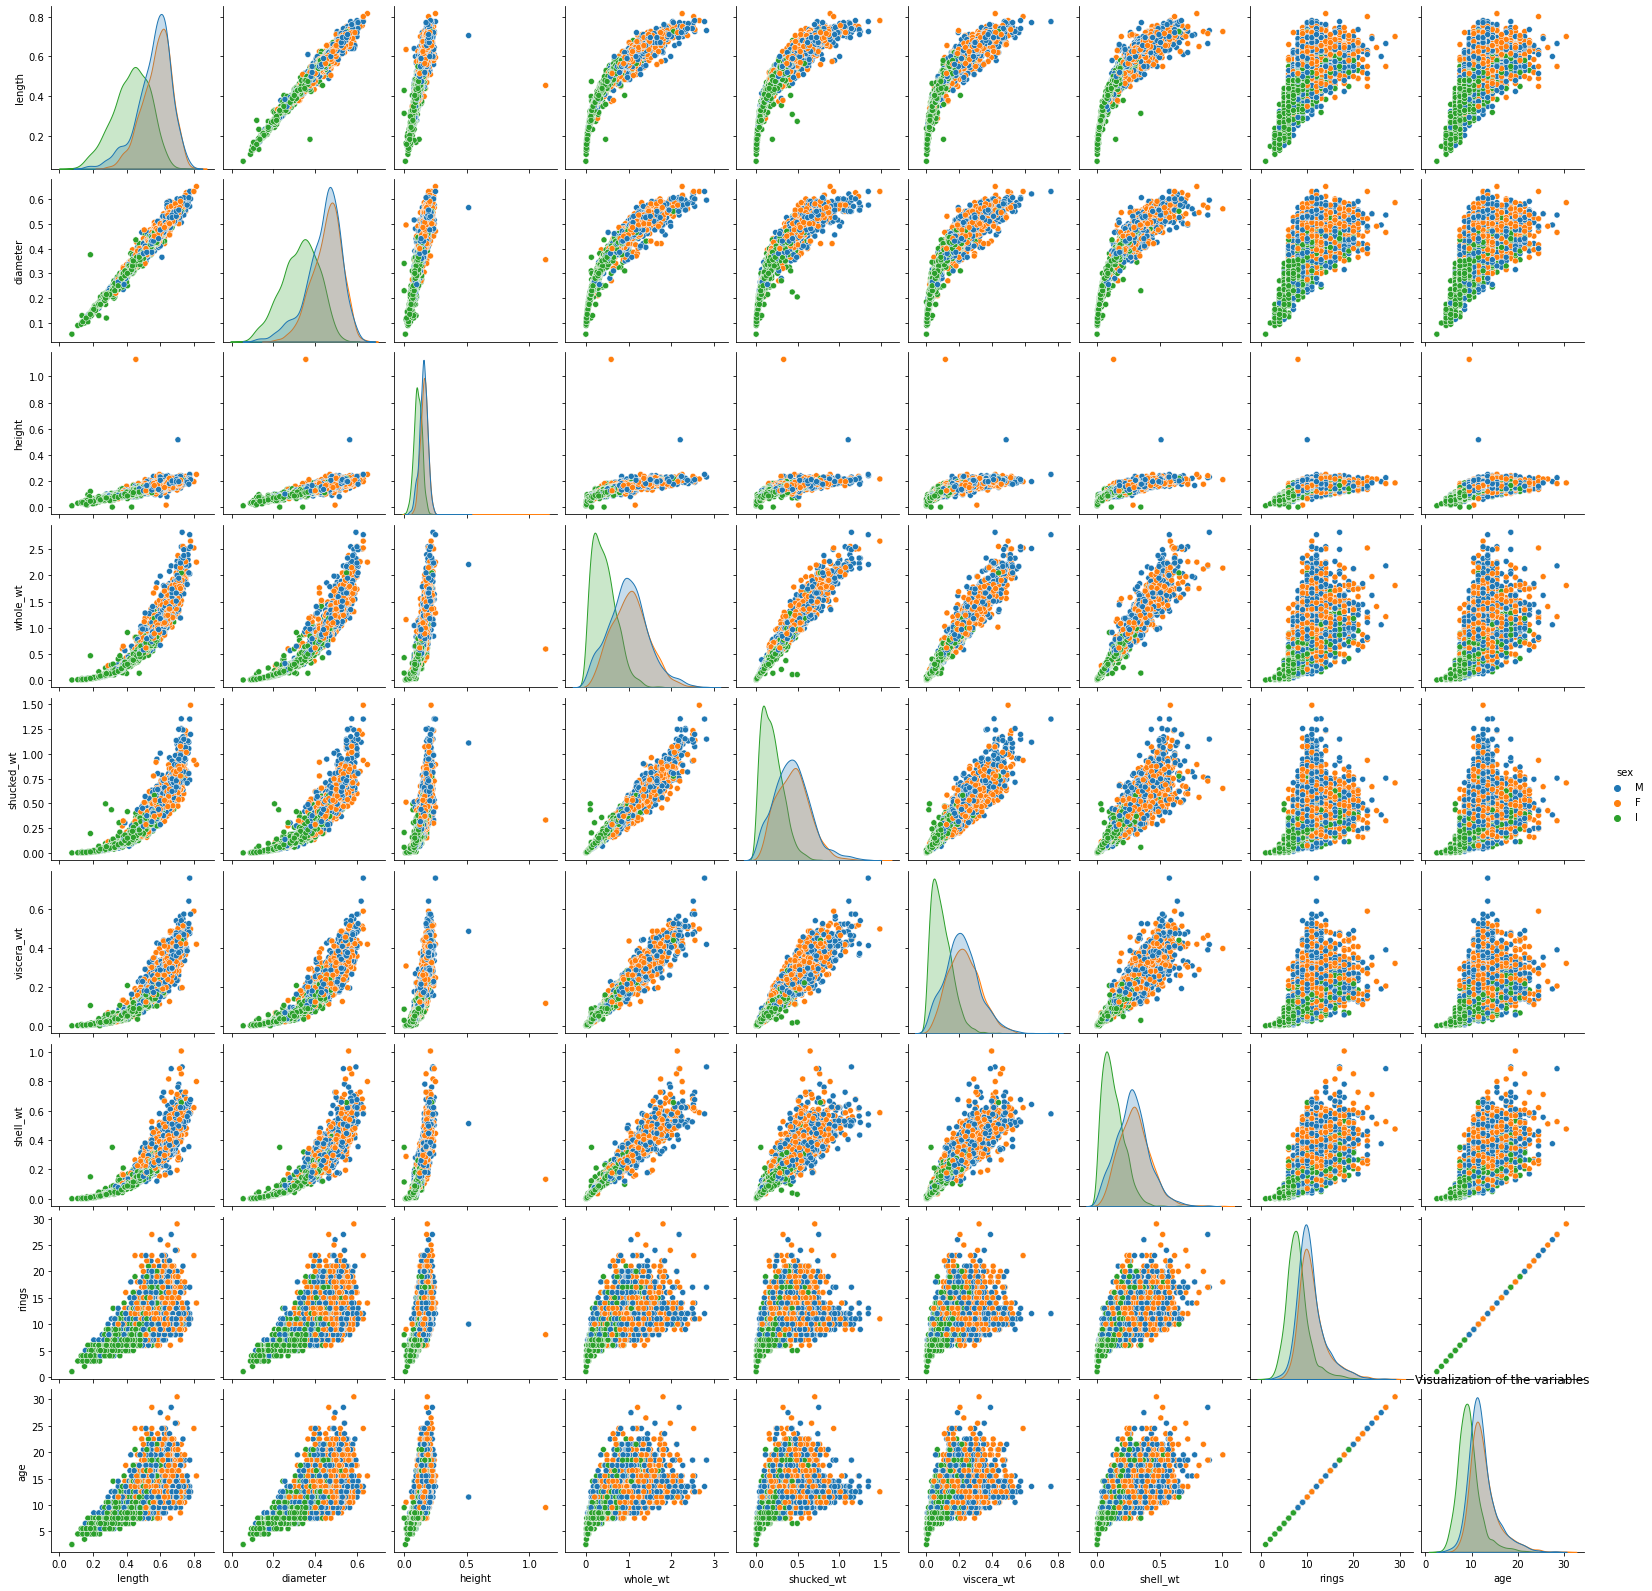

In [1671]:
# Exploratory analysis, visualization of the relationships between the parameters in the different sex groups
# Scatter plots because we have a lot of continuous variables

sns.pairplot(data= abalone, hue = 'sex', vars=('length', 'diameter', 'height', 'whole_wt', 'shucked_wt','viscera_wt', 'shell_wt','rings', 'age'))
plt.title('Visualization of the variables')
plt.show()


<Figure size 432x288 with 0 Axes>

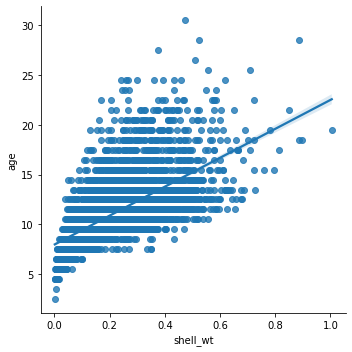

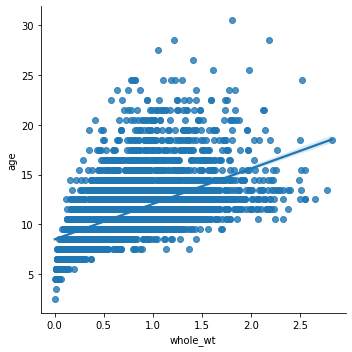

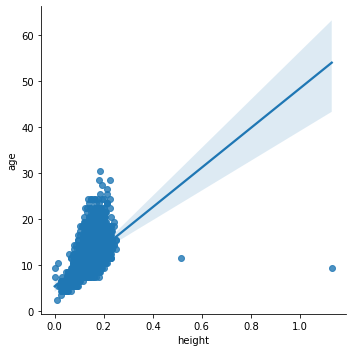

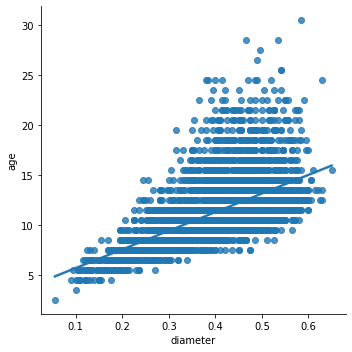

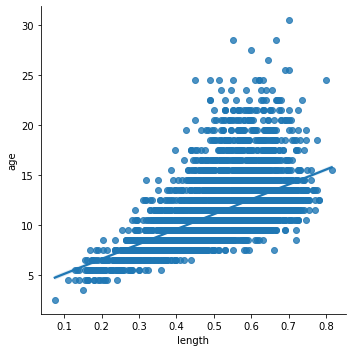

In [1672]:
plt.figure()

sns.lmplot(x='shell_wt', y = 'age', data =abalone)

sns.lmplot(x='whole_wt', y = 'age', data =abalone)

sns.lmplot(x='height', y = 'age', data =abalone)

sns.lmplot(x='diameter', y = 'age', data =abalone)

sns.lmplot(x='length', y = 'age', data =abalone)


plt.show()

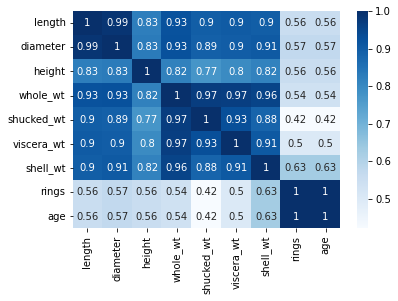

In [1673]:
# Using Heatmap
sns.heatmap(abalone.corr(), annot = True, cmap = 'Blues')

- We could notice that rings and age correlation = 1 because age = rings + 1.5
  - Thus, rings column should be dropped
- We could also notice that the highest corrlation was with shell weight, which is reliable cause age depends on the number of rings in the shell, but the correlation is still not very high.

- We could see that diameter, lenght are highly correlated to other features, tht's mean we could drop them. but later on when we run our model, it only gave high score when all features are used.

# **1. Linear Regression Model**

In [1674]:
# Getting dummies for sex variable (Male, Female, Infant)
gender_dummies =pd.get_dummies(abalone.sex, drop_first = True)
gender_dummies

,I,M
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
4172,0,0
4173,0,1
4174,0,1
4175,0,0


In [1675]:
abalone = pd.concat([abalone, gender_dummies], 
                      axis = 'columns')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,0,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,0,0


In [1676]:
# Specifiying X and y

In [1677]:
X = abalone.drop(abalone[['age', 'rings', 'sex']], axis = 1)
X

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,0


In [1678]:
y = abalone['age']
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [1679]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.15,random_state = 10)

In [1680]:
X_train

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,I,M
1762,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,0,1
4123,0.490,0.375,0.115,0.5570,0.2275,0.1335,0.1765,1,0
3068,0.650,0.510,0.175,1.3165,0.6345,0.2605,0.3640,0,1
3092,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.1880,0,1
2259,0.590,0.465,0.160,1.1005,0.5060,0.2525,0.2950,0,0
...,...,...,...,...,...,...,...,...,...
2009,0.430,0.320,0.110,0.3675,0.1675,0.1020,0.1050,1,0
1180,0.655,0.515,0.160,1.3100,0.5530,0.3690,0.3450,0,1
3441,0.465,0.355,0.115,0.4705,0.1955,0.1180,0.1260,0,0
1344,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,0,1


In [1681]:
X_test

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,I,M
1080,0.430,0.335,0.120,0.3970,0.1985,0.0865,0.1035,0,1
1371,0.615,0.500,0.170,1.0540,0.4845,0.2280,0.2950,0,1
2591,0.585,0.450,0.160,0.9045,0.4050,0.2215,0.2335,0,0
235,0.295,0.225,0.080,0.1240,0.0485,0.0320,0.0400,1,0
2143,0.470,0.370,0.105,0.4665,0.2025,0.1015,0.1550,0,1
...,...,...,...,...,...,...,...,...,...
1358,0.605,0.485,0.150,1.2380,0.6315,0.2260,0.3300,1,0
2625,0.770,0.600,0.215,2.1945,1.0515,0.4820,0.5840,0,1
83,0.595,0.475,0.160,1.3175,0.4080,0.2340,0.5800,0,1
3374,0.475,0.375,0.125,0.5880,0.2370,0.1715,0.1550,0,0


In [1682]:
from sklearn.linear_model import LinearRegression

In [1683]:
lin_model = LinearRegression()

In [1684]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [1685]:
# Validation of the linear regression model

training_score = lin_model.score(X_train,  y_train)
test_score = lin_model.score(X_test,  y_test)

print(f'Linear Regression -Training set score: {training_score:.2f}')
print(f'Linear Regression -Test set score: {test_score:.2f}')


Linear Regression -Training set score: 0.54
Linear Regression -Test set score: 0.54


In [1686]:
# Regularization using L2 penalty with differnt alpha values

from sklearn.linear_model import Ridge

Ridge_dict = []

for val in np.arange(0, 1.1, 0.1):
    ridge = Ridge(alpha = val).fit(X_train, y_train)

    Ridge_training_score = ridge.score(X_train, y_train)
    Ridge_Testing_score = ridge.score(X_test, y_test)

    Ridge_dict.append({"Alpha":val, "Training_score":Ridge_training_score,
                       "Testing_score": Ridge_Testing_score})

Ridge_df = pd.DataFrame(Ridge_dict)

Ridge_df

,Alpha,Training_score,Testing_score
0,0.0,0.536942,0.542625
1,0.1,0.536880,0.542437
2,0.2,0.536724,0.542240
3,0.3,0.536503,0.542032
4,0.4,0.536235,0.541809
5,0.5,0.535930,0.541572
6,0.6,0.535597,0.541321
7,0.7,0.535242,0.541056
8,0.8,0.534869,0.540780
9,0.9,0.534481,0.540491


- After trying using differnt features alone as length, shell weight, and trying different features combinations, we got scores as low as 0.2 - 0.3.

- Only after using all features, the score increased to 0.5

- We also tried dropping the infant group, but this also decreased the score.

- Standardization also decreased scores.

- When tried regularizayion using (Lasso), score decreased to 0.2, which means that neglecting some features affected the model negatively.

- We can conclude that age determination can't depend on one on two features only.

# **2. Logistic Regression Model (Multiclass)**

- We were thinking about using logistic regression, dividing the age into 4 categories:

1. **Immature:** **age** <= 5.5 years
2. **Young:** 5.5 < **age**  <= 25% percentile
3. **Middle:** 25% percentile <**age** < 75% percentile
4. **Old:** = **age** >= 75% percentile

In [1724]:
abalone_2 = pd.read_csv('/content/drive/MyDrive/Tech4Dev/Databases/abalone.csv')
abalone_2.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [1725]:
abalone_2.age.describe()

count    4177.000000
mean       11.433684
std         3.224169
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: age, dtype: float64

In [1726]:
def age_cat_convert(val):
    if val <= 5.5:
        return'Immature'
    elif 5.5 < val <= 9.5: 
        return'Young'
    elif 9.5 < val < 12.5: 
        return'Middle'
    elif val >= 12.5: 
        return'Old'

abalone_2['age_cat'] = abalone_2['age'].map(age_cat_convert)
abalone_2

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_cat
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,Middle
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,Middle
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,Young
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,Old
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,Middle
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,Middle
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,Middle


In [1727]:
sex_dummies =pd.get_dummies(abalone_2.sex, drop_first = True)
sex_dummies

,I,M
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
4172,0,0
4173,0,1
4174,0,1
4175,0,0


In [1728]:
abalone_2 = pd.concat([abalone_2, sex_dummies], axis= 1)
abalone_2

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_cat,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,Old,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,Young,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,Middle,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,Middle,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,Young,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,Old,0,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,Middle,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,Middle,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,Middle,0,0


In [1729]:
abalone_2.drop(['rings', 'age', 'sex'], axis = 1, inplace = True)
abalone_2

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age_cat,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,Old,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,Young,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,Middle,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,Middle,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,Young,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,Old,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,Middle,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,Middle,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,Middle,0,0


In [1730]:
#split data into target and feature

X = abalone_2.drop(['age_cat'], axis =1)

y= abalone_2['age_cat']

In [1731]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [1732]:
#check the shapeof our split 

X_train.shape, X_test.shape

((3341, 9), (836, 9))

In [1733]:
X_test

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,I,M
668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1
...,...,...,...,...,...,...,...,...,...
575,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500,0,0
3231,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250,0,1
1084,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170,1,0
290,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250,0,1


In [1734]:
cols = X_train.columns

In [1735]:
cols

Index(['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt',
       'shell_wt', 'I', 'M'],
      dtype='object')

In [1736]:
# # #feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [1737]:
X_test

array([[0.65079365, 0.62135922, 0.61363636, ..., 0.36995516, 0.        ,
        1.        ],
       [0.57142857, 0.57281553, 0.45454545, ..., 0.21132287, 1.        ,
        0.        ],
       [0.76190476, 0.72815534, 0.61363636, ..., 0.35033632, 0.        ,
        1.        ],
       ...,
       [0.48412698, 0.46601942, 0.38636364, ..., 0.12556054, 1.        ,
        0.        ],
       [0.63492063, 0.6407767 , 0.72727273, ..., 0.35874439, 0.        ,
        1.        ],
       [0.17460317, 0.13592233, 0.18181818, ..., 0.01681614, 1.        ,
        0.        ]])

In [1738]:
y_test.value_counts()

Old         295
Young       291
Middle      234
Immature     16
Name: age_cat, dtype: int64

In [1739]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,I,M
0,0.141892,0.134454,0.070796,0.011161,0.009079,0.008558,0.008470,1.0,0.0
1,0.189189,0.159664,0.048673,0.014041,0.009415,0.011192,0.010962,1.0,0.0
2,0.790541,0.798319,0.150442,0.499910,0.396436,0.278473,0.449925,0.0,1.0
3,0.864865,0.789916,0.176991,0.679748,0.638198,0.573404,0.427504,0.0,1.0
4,0.702703,0.672269,0.137168,0.374077,0.279085,0.276498,0.362232,0.0,1.0
...,...,...,...,...,...,...,...,...,...
3336,0.777027,0.789916,0.163717,0.583258,0.446200,0.423963,0.473842,0.0,1.0
3337,0.783784,0.747899,0.123894,0.420702,0.362811,0.417380,0.282511,0.0,0.0
3338,0.702703,0.663866,0.128319,0.344554,0.310693,0.271231,0.251121,0.0,1.0
3339,0.743243,0.731092,0.146018,0.405041,0.320108,0.310731,0.315894,0.0,0.0


In [1740]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [1759]:
# Model training 
# We will use solver = lbfgs as we have multiclass + want to apply l2 penality (Ridge)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', multi_class= 'multinomial', penalty = 'l2',  max_iter=1000)

logreg.fit(X_train.values, y_train.values)

LogisticRegression(max_iter=1000, multi_class='multinomial')

**Validation Metrics**

In [1760]:
#check for accuracy 

from sklearn.metrics import accuracy_score

y_pred_test = logreg.predict(X_test.values)
y_pred_train = logreg.predict(X_train.values)


print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))

Model accuracy score(train):  0.6189763543849147
Model accuracy score(test):  0.6375598086124402


In [1755]:
# Check null accuracy 

y_test.value_counts()

Old         295
Young       291
Middle      234
Immature     16
Name: age_cat, dtype: int64

In [1756]:
null_acuracy = 302/(len(y_test))
null_acuracy

0.361244019138756

In [1757]:
# null accuracy is less than our actual accuracy, which is good.

# **Conclusion**

We can see an infant category in SEX, which is unusual.

After research, we found that:
- Abalone live about 35 to 40 years. 
  - This is consistent with our data where maximum age = 30.5 years old
- Adults become sexually mature when they are 4 to 6 years old. 

- We can see that minimum age in Female group = 6.5, in Males = 4.5, which is convinent with the mentioned information that maturity occurs at age 4 -6 years old.

- When looking at infant age distribution, we've found that maximum age in infant group = 22.5 which is not convenient.
  - Thus, we were thinking about trimming infant data where age > (mean of minimum adult age) ie. > 5.5 years



- Almost all infant data is > 5.5, which means that removing these data is the same as removing the whole infant data.

- Only 9 abalones are below 5.5 in Adult males and females, which is consistent with our opinion.


From a study on certain types of abalone, it was found that growth rates were high initially and size-dependent for about the first 4 years during which shell length was a good predictor of age. Thereafter, growth rates were declined with increasing size resulting in a sigmoid growth curve (See the figure below)

Thus shell length will be more appropriate in defining age especially in young age.

In [1758]:
# https://scialert.net/fulltext/?doi=jfas.2009.210.227
from IPython.display import Image
Image (url = 'https://docsdrive.com/images/academicjournals/jfas/2009/fig7-2k9-210-227.gif')

- We can see that in infant group, the relationship of age with length shows more linearity than with whole weight.

- We could notice that rings and age correlation = 1 because age = rings + 1.5
  - Thus, rings column should be dropped
- We could also notice that the highest corrlation was with shell weight, which is reliable cause age depends on the number of rings in the shell, but the correlation is still not very high.

- We could see that diameter, lenght are highly correlated to other features, tht's mean we could drop them. but later on when we run our model, it only gave high score when all features are used.

- After trying using differnt features alone as length, shell weight, and trying different features combinations, we got scores as low as 0.2 - 0.3.

- Only after using all features, the score increased to 0.5

- We also tried dropping the infant group, but this also decreased the score.

- Standardization also decreased scores.

- When tried regularizayion using (Lasso), score decreased to 0.2, which means that neglecting some features affected the model negatively.

- We can conclude that age determination can't depend on one on two features only.

- We were thinking about using logistic regression, dividing the age into 4 categories:

1. **Immature:** **age** <= 5.5 years
2. **Young:** 5.5 < **age**  <= 25% percentile
3. **Middle:** 25% percentile <**age** < 75% percentile
4. **Old:** = **age** >= 75% percentile

**References:**

1. https://www.fisheries.noaa.gov/species/white-abalone
2. https://scialert.net/fulltext/?doi=jfas.2009.210.227
